In [1]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 장점
# 기준에 포함되지 못하는 데이터를 제외하기 때문에 이상치에 강건함
# 데이터의 밀도에 따라 클러스터를 만들기 때문에 기하학적인 형태를 가진 데이터 세트에 효과적

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 단점
# 고차원 데이터일수록 데이터간 밀도를 계산하기 어렵고, 연산이 많아져 학습 속도가 느려짐



In [2]:
# 0.필요모듈 import
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# 1. make_moons 를 이용한 데이터 생성

n_samples = 1000
np.random.seed(3)

# make moons
# X, y = make_moons(n_samples=n_samples, noise=.05)  # noise: 잡음의 크기. 0이면 정확한 반원을 이룸
# df = pd.DataFrame(X)

# make circles
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
df = pd.DataFrame(X)

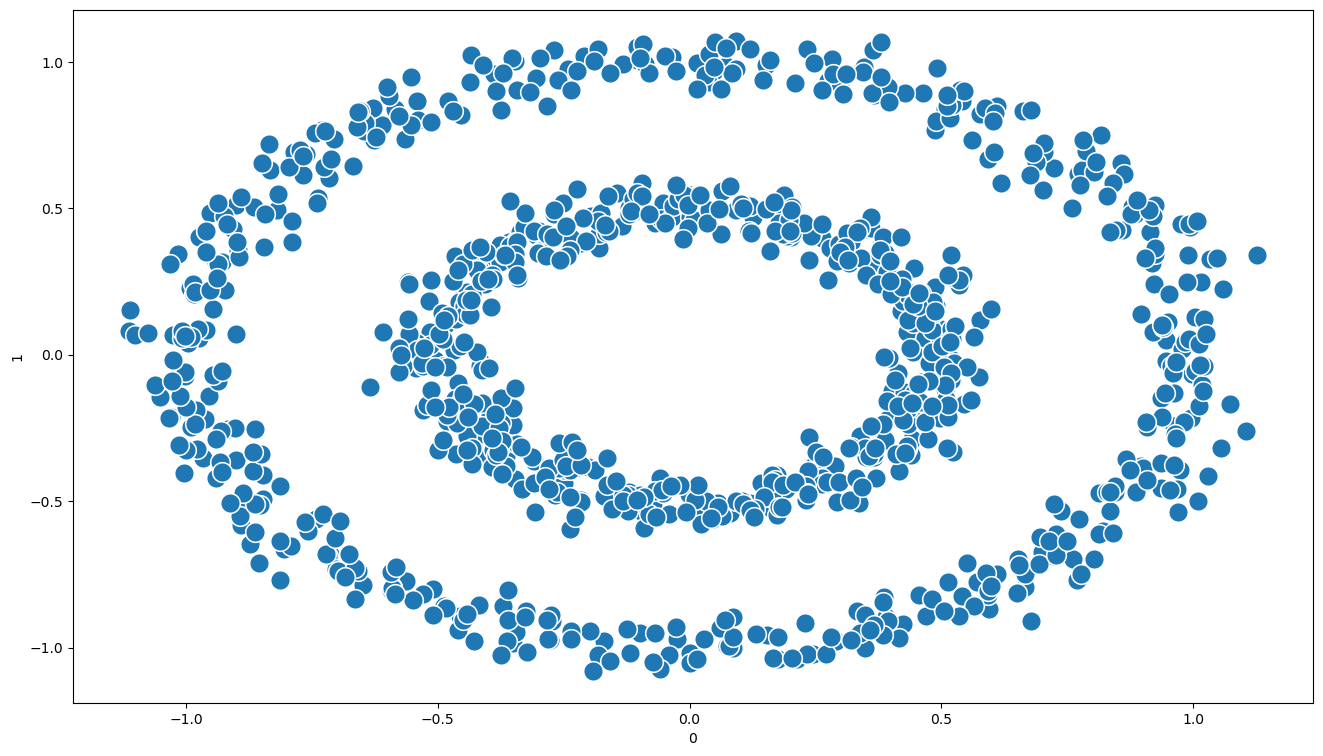

In [4]:
#시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], marker='o', s=200)

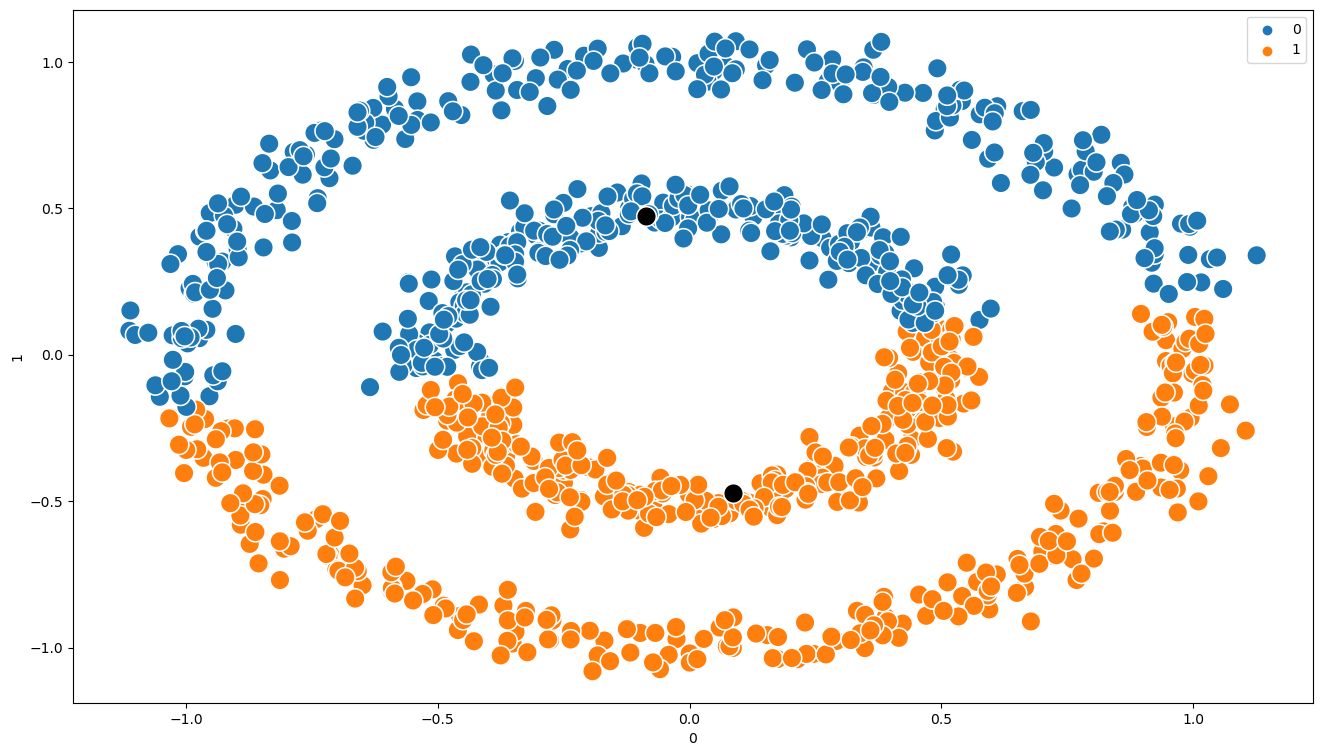

In [5]:
# 2. k- means 클러스터링 
# k-means 모델 학습
model = KMeans(n_clusters=2, random_state = 123)
model.fit(df)

# 클러스터 라벨링
df['kmeans_label'] = model.predict(df)

# 각 군집의 중심점
centers = model.cluster_centers_

# 클러스터링 결과 시각화
plt.figure(figsize=(16, 9))

sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'] , s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', s=200)

In [6]:
# kmeans 결과 drop
df = df.drop(columns=['kmeans_label'], axis=1)

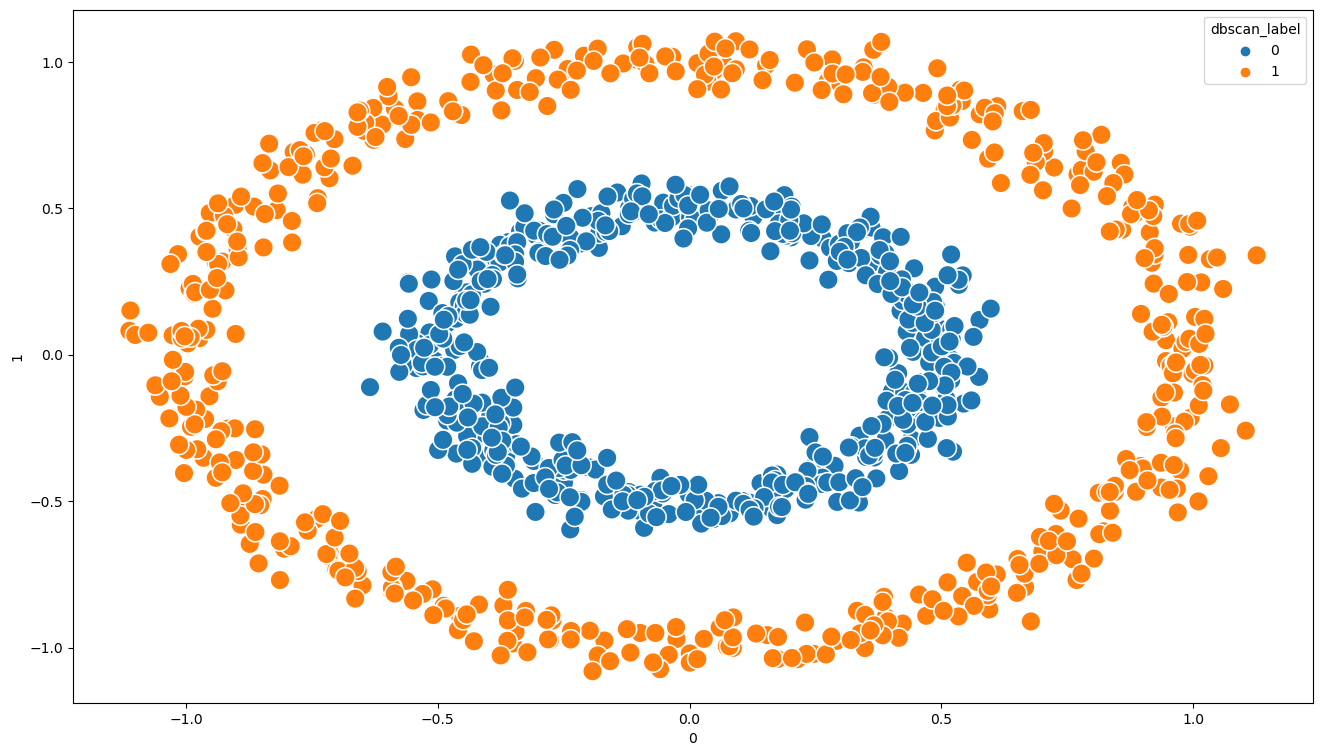

In [7]:
eps = 0.1 # 반경
min_samples = 5 # 최소 데이터 갯수

# DBSCAN 모델 학습
model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)
df['dbscan_label'] = model.labels_

# 시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], hue=df['dbscan_label'], s=200)